In [1]:
import keras
import numpy as np
from keras import metrics
from keras.models import Sequential
from keras import backend as K
from keras.models import load_model
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D

batch_size = 32
num_classes = 6
epochs = 50

Using TensorFlow backend.


In [3]:
import tensorflow as tf

In [4]:
training_vector = one_hot_vector = list()
training_vector = np.load('face_detected.npy')
one_hot_vector = np.load('one_hot.npy')
print(training_vector.shape)
one_hot_vector.shape

(197, 200, 200, 3)


(197, 6)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(training_vector, one_hot_vector, test_size=0.08, random_state=42)
y_test.shape

(16, 6)

In [6]:
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=0.0001),
             metrics=['acc'])

In [9]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

Train on 181 samples, validate on 16 samples
Epoch 1/50
181/181 [==============================] - 12s 64ms/sample - loss: 1.8958 - acc: 0.2099 - val_loss: 1.5674 - val_acc: 0.3125
Epoch 2/50
181/181 [==============================] - 8s 45ms/sample - loss: 1.5892 - acc: 0.3867 - val_loss: 1.4459 - val_acc: 0.3125
Epoch 3/50
181/181 [==============================] - 8s 45ms/sample - loss: 1.3679 - acc: 0.6243 - val_loss: 1.2613 - val_acc: 0.5625
Epoch 4/50
181/181 [==============================] - 8s 45ms/sample - loss: 1.2367 - acc: 0.6243 - val_loss: 1.2542 - val_acc: 0.4375
Epoch 5/50
181/181 [==============================] - 8s 47ms/sample - loss: 1.1352 - acc: 0.6298 - val_loss: 1.0079 - val_acc: 0.8750
Epoch 6/50
181/181 [==============================] - 8s 45ms/sample - loss: 0.9572 - acc: 0.7680 - val_loss: 0.8959 - val_acc: 0.7500
Epoch 7/50
181/181 [==============================] - 8s 45ms/sample - loss: 0.8927 - acc: 0.7790 - val_loss: 0.7738 - val_acc: 0.9375
Epoch 8/5

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4718656   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3

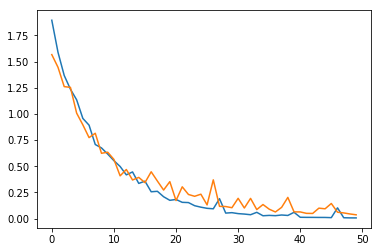

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

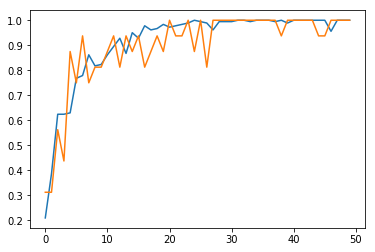

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

In [14]:
import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
testing = cv2.imread('IMG_20191119_135242.jpg')
faces=face_cascade.detectMultiScale(testing,scaleFactor=1.3,minNeighbors=15)
if len(faces) != 0:
    testing = testing[faces[0][1]: faces[0][1] + faces[0][3], faces[0][0]: faces[0][0] + faces[0][2]]
    testing = cv2.resize(testing, (200, 200)) 
    testing = testing.reshape(1, 200, 200, 3)
score = model.predict_classes(testing)
score

array([5], dtype=int64)

# Database

In [15]:
import pymysql

In [16]:
import datetime
old_time = datetime.datetime.now()
print(old_time.time())
#new_time = datetime.datetime.now() - old_time
#old_time.hour - 3

00:06:26.191616


In [17]:
from datetime import time
import datetime
#t = datetime.datetime.now()
time = time(10, 15, 56)   ## REPLACE WITH - time = time(t.time().hour, t.time().minute, t.time().second)
print("hour =", time.hour)
print("minute =", time.minute)
print("second =", time.second)
print("microsecond =", time.microsecond)
import time
a = time.strftime('%A')
a = a.lower()
print(a)

hour = 10
minute = 15
second = 56
microsecond = 0
saturday


In [18]:
#day = time.strftime('%A')   ## REMOVE comment
    #day = day.lower()   ## REMOVE comment
    #t = datetime.datetime.now()
    time = time(9, 10, 56)    ## REPLACE WITH - time = time(t.time().hour, t.time().minute, t.time().second)
    score = score
    

IndentationError: unexpected indent (<ipython-input-18-19c9f36bc231>, line 4)

In [20]:
def database(score):
    day = 'thursday'
    from datetime import time
    time = time(9, 11, 56)
    score = score
    #------------------------------------------------------------------------------------------------------------------------------

    if day == 'monday':
        if time.hour == 9:
            if time.minute > 0 and time.minute <=30: 
                try:
                    a11 = 0
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update monday set TimeIn1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                    a11 = time.minute 
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()
            else:

                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn1 from monday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                
                
                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update monday set Mathematics='"+'Present'+"', TimeOut1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update monday set Mathematics='"+'Absent'+"', TimeOut1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()

######## monday -- 9 ###################______________----------------------------------------------------------

        elif time.hour == 10:
            if time.minute > 0 and time.minute <= 30:  
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update monday set TimeIn2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()


            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn2 from monday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update monday set Algorithms='"+'Present'+"', TimeOut2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')
                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update monday set Algorithms='"+'Absent'+"', TimeOut2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')
                        

                    except:
                        conn.rollback()
                        print('not save')
                        conn.close()

######## monday -- 10 ########################################################
        elif time.hour == 11:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update monday set TimeIn3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()

            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn3 from monday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update monday set DeepLearning='"+'Present'+"', TimeOut3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update monday set DeepLearning='"+'Absent'+"', TimeOut3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()


######## monday --- 11 #######################################################
        elif time.hour == 13:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update monday set TimeIn4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                    a14 = time.minute 
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()
            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn4 from monday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update monday set ImageProcessing='"+'Present'+"', TimeOut4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update monday set ImageProcessing='"+'Absent'+"', TimeOut4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()

#########################################################################################################

    if day == 'tuesday':
        if time.hour == 9:
            if time.minute > 0 and time.minute <30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update tueday set TimeIn1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                    a21 = time.minute
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()

            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn1 from tueday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update tuesday set DeepLearningLab ='"+'Present'+"', TimeOut1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update tueday set DeepLearningLab='"+'Absent'+"', TimeOut1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()

######## monday -- 9 ###################______________----------------------------------------------------------

        elif time.hour == 10:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update tueday set TimeIn2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()


            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn2 from tueday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update tueday set DeepLearningLab2='"+'Present'+"', TimeOut2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')
                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update tueday set DeepLearningLab2='"+'Absent'+"', TimeOut2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')
                        conn.close()

######## monday -- 10 ########################################################
        elif time.hour == 11:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update tueday set TimeIn3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                    a23 = time.minute 
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()

            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn3 from tueday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update tueday set Mathematics='"+'Present'+"', TimeOut3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update tueday set Mathematics='"+'Absent'+"', TimeOut3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()


######## monday --- 11 #######################################################
        elif time.hour == 13:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update tueday set TimeIn4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()

            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn4 from tueday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update tueday set DBMS='"+'Present'+"', TimeOut4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update tueday set DBMS='"+'Absent'+"', TimeOut4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')
                        
                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()



#=============================================================================================================================        
#########################################################################################################

    if day == 'wednesday':
        if time.hour == 9:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update wednesday set TimeIn1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()

            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn1 from wednesday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update wednesday set Algorithms ='"+'Present'+"', TimeOut1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update wednesday set Algorithms='"+'Absent'+"', TimeOut1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()

######## monday -- 9 ###################______________----------------------------------------------------------

        elif time.hour == 10:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update wednesday set TimeIn2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                    a32 = time.minute 
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()


            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn2 from wednesday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update wednesday set ImageProcessing='"+'Present'+"', TimeOut2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')
                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update wednesday set ImageProcessing='"+'Absent'+"', TimeOut2='"+str(time)+"' where EnrollNo='"+str(100 +score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')
                        conn.close()

######## monday -- 10 ########################################################
        elif time.hour == 11:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update wednesday set TimeIn3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                    a33 = time.minute 
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()

            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn3 from wednesday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update wednesday set DBMSLab='"+'Present'+"', TimeOut3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update wednesday set DBMSLab='"+'Absent'+"', TimeOut3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()


######## monday --- 11 #######################################################
        elif time.hour == 13:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update wednesday set TimeIn4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()
            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn4 from wednesday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update wednesday set DBMSLab2='"+'Present'+"', TimeOut4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update wednesday set DBMSLab2='"+'Absent'+"', TimeOut4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()




#########################################################################################################

    if day == 'thursday':
        if time.hour == 9:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update thursday set TimeIn1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()

            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn1 from thursday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update thursday set ImageProcessingLab ='"+'Present'+"', TimeOut1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update thursday set ImageProcessingLab ='"+'Absent'+"', TimeOut1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')
                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()

######## monday -- 9 ###################______________----------------------------------------------------------

        elif time.hour == 10:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update thursday set TimeIn2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()


            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn2 from thursday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update thursday set ImageProcessingLab2='"+'Present'+"', TimeOut2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')
                    except:
                        conn.rollback()
                        print('not save')
                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update thursday set ImageProcessingLab2='"+'Absent'+"', TimeOut2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')
                        conn.close()

######## monday -- 10 ########################################################
        elif time.hour == 11:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update thursday set TimeIn3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()

            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn3 from thursday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update thursday set DeepLearning='"+'Present'+"', TimeOut3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update thursday set DeepLearning='"+'Absent'+"', TimeOut3='"+str(time)+"' where EnrollNo='"+str(100 +score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()


######## monday --- 11 #######################################################
        elif time.hour == 13:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update thursday set TimeIn4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()

            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn4 from thursday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update thursday set DBMS='"+'Present'+"', TimeOut4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update thursday set DBMS='"+'Absent'+"', TimeOut4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')


                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()



#########################################################################################################

    if day == 'friday':
        if time.hour == 9:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update friday set TimeIn1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()

            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn1 from friday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update friday set Mathematics ='"+'Present'+"', TimeOut1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update friday set Mathematics ='"+'Absent'+"', TimeOut1='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')
                        
                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()

######## monday -- 9 ###################______________----------------------------------------------------------

        elif time.hour == 10:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update friday set TimeIn2='"+str(time)+"' where EnrollNo='"+str(100 +score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()


            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn2 from friday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update friday set DeepLearning='"+'Present'+"', TimeOut2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')
                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update friday set DeepLearning='"+'Absent'+"', TimeOut2='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')
                        conn.close()

######## monday -- 10 ########################################################
        elif time.hour == 11:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update friday set TimeIn3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()

            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn3 from friday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update friday set Algorithms='"+'Present'+"', TimeOut3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update friday set Algorithms='"+'Absent'+"', TimeOut3='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()


######## monday --- 11 #######################################################
        elif time.hour == 13:
            if time.minute > 0 and time.minute < 30:
                try:
                    conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                    a = conn.cursor()
                    a.execute("update friday set TimeIn4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                    conn.commit()
                    print('save')
                except:
                    conn.rollback()
                    print('not save')

                    conn.close()
            else:
                conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                a = conn.cursor()
                a.execute("select TimeIn4 from friday where EnrollNo='"+str(100 + score)+"'")
                results=a.fetchall()
                minutes = results[0][0].total_seconds() % 3600 // 60

                if time.minute - minutes > 30:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update friday set ImageProcessing='"+'Present'+"', TimeOut4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()
                else:
                    try:
                        conn = pymysql.connect(host='localhost',user='root',password='',db='Attendence')
                        a = conn.cursor()
                        a.execute("update thursday set ImageProcessing='"+'Absent'+"', TimeOut4='"+str(time)+"' where EnrollNo='"+str(100 + score)+"'")
                        conn.commit()
                        print('save')

                    except:
                        conn.rollback()
                        print('not save')

                        conn.close()


#=============================================================================================================================        



# Database show

In [21]:
from tkinter import*
import pymysql
def show():
    def sel():
        no = str(var.get())
        if no == '1':
            win = Tk()
            conn=pymysql.connect(host='localhost',user='root',password='',db='attendence')
            a=conn.cursor()
            b=a.execute("select * from monday")
            data=a.fetchall()
            count=a.rowcount
            num=2
            sub = ['EnrollNo','Name','Date','TimeIn1','TimeOut1','Mathematics','TimeIn2','TimeOut2','Algorithms','TimeIn3','TimeOut3','DeepLearning','TimeIn4','TimeOut4','ImageProcessing']

            for k in range(15):
                Label(win,text=sub[k]).grid(row=1,column=k)

            for i in range(6):
                for j in range(15):
                    Label(win,text=str(data[i][j])).grid(row=i+2,column=j)

            head=Label(win,text="Monday's Database",font="Times 38 bold").grid(row=0,column=3,columnspan=8,padx=50,pady=5)


            selection="you selected option "+ no
            label.config(text=selection)
        if no == '2':
            win = Tk()
            conn=pymysql.connect(host='localhost',user='root',password='',db='attendence')
            a=conn.cursor()
            b=a.execute("select * from tueday")
            data=a.fetchall()
            count=a.rowcount
            num=2
            sub = ['EnrollNo','Name','Date','TimeIn1','TimeOut1','DeepLearningLab','TimeIn2','TimeOut2','DeepLearningLab2','TimeIn3','TimeOut3','Mathematics','TimeIn4','TimeOut4','DBMS']
            for k in range(15):
                Label(win,text=sub[k]).grid(row=1,column=k)

            for i in range(6):
                for j in range(15):
                    Label(win,text=str(data[i][j])).grid(row=i+2,column=j)

            head=Label(win,text="Tuesday's Database",font="Times 38 bold").grid(row=0,column=3,columnspan=8,padx=50,pady=5)


            selection="you selected option "+ no
            label.config(text=selection)

        if no == '3':
            win = Tk()
            conn=pymysql.connect(host='localhost',user='root',password='',db='attendence')
            a=conn.cursor()
            b=a.execute("select * from wednesday")
            data=a.fetchall()
            count=a.rowcount
            num=2
            sub = ['EnrollNo','Name','Date','TimeIn1','TimeOut1','Algorithms','TimeIn2','TimeOut2','ImageProcessing','TimeIn3','TimeOut3','DBMSLab','TimeIn4','TimeOut4','DBMSLab2']
            for k in range(15):
                Label(win,text=sub[k]).grid(row=1,column=k)

            for i in range(6):
                for j in range(15):
                    Label(win,text=str(data[i][j])).grid(row=i+2,column=j)

            head=Label(win,text="Wesnesday's Database",font="Times 38 bold").grid(row=0,column=3,columnspan=8,padx=50,pady=5)


            selection="you selected option "+ no
            label.config(text=selection)
        if no == '4':
            win = Tk()
            conn=pymysql.connect(host='localhost',user='root',password='',db='attendence')
            a=conn.cursor()
            b=a.execute("select * from thursday")
            data=a.fetchall()
            count=a.rowcount
            num=2
            sub = ['EnrollNo','Name','Date','TimeIn1','TimeOut1','ImageProcessingLab','TimeIn2','TimeOut2','ImageProcessingLab2','TimeIn3','TimeOut3','DeepLearning','TimeIn4','TimeOut4','DBMS']
            for k in range(15):
                Label(win,text=sub[k]).grid(row=1,column=k)

            for i in range(6):
                for j in range(15):
                    Label(win,text=str(data[i][j])).grid(row=i+2,column=j)

            head=Label(win,text="Thursday's Database",font="Times 38 bold").grid(row=0,column=3,columnspan=8,padx=50,pady=5)


            selection="you selected option "+ no
            label.config(text=selection)
        if no == '5':
            win = Tk()
            conn=pymysql.connect(host='localhost',user='root',password='',db='attendence')
            a=conn.cursor()
            b=a.execute("select * from friday")
            data=a.fetchall()
            count=a.rowcount
            num=2
            sub = ['EnrollNo','Name','Date','TimeIn1','TimeOut1','Mathematics','TimeIn2','TimeOut2','DeepLearning','TimeIn3','TimeOut3','Algorithms','TimeIn4','TimeOut4','ImageProcessing']
            for k in range(15):
                Label(win,text=sub[k]).grid(row=1,column=k)

            for i in range(6):
                for j in range(15):
                    Label(win,text=str(data[i][j])).grid(row=i+2,column=j)

            head=Label(win,text="Friday's Database",font="Times 38 bold").grid(row=0,column=3,columnspan=8,padx=50,pady=5)


            selection="you selected option "+ no
            label.config(text=selection)


    root=Tk()
    label=Label(root, text='Choose Day!!')
    label.grid(row=0,column=0, sticky=NSEW)

    var=IntVar()

    r1=Radiobutton(root,text="Monday",variable=var,value=1)
    r1.grid(row=1, column=0, sticky=W)

    r2=Radiobutton(root,text="Tuesday",variable=var,value=2)
    r2.grid(row=2, column=0, sticky=W)

    r3=Radiobutton(root,text="Wednesday",variable=var,value=3)
    r3.grid(row=3, column=0, sticky=W)

    r2=Radiobutton(root,text="Thursday",variable=var,value=4)
    r2.grid(row=4, column=0, sticky=W)

    r3=Radiobutton(root,text="Friday",variable=var,value=5)
    r3.grid(row=5, column=0, sticky=W)
    btn = Button(root,text='submit', command=sel).grid(row=6,columnspan=2,column=0,sticky=NSEW)
    mainloop()

# Graphical User Interface

In [1]:
import cv2
import tkinter
import cv2
import PIL.Image, PIL.ImageTk
import time
import tkinter
import pymysql
 
class App:
    def __init__(self, window, window_title, video_source=0):
        self.window = window
        self.window.title(window_title)
        self.video_source = video_source

        # open video source (by default this will try to open the computer webcam)
        self.vid = MyVideoCapture(self.video_source)

        # Create a canvas that can fit the above video source size
        self.canvas = tkinter.Canvas(window, width = self.vid.width, height = self.vid.height)
        self.canvas.grid(row=0,column=0,pady=2, padx=3, columnspan=6)
  
        # Button that lets the user take a snapshot
        self.btn_snapshot=tkinter.Button(window, text="Snapshot", width=20, command=self.snapshot)
        self.btn_snapshot.grid(row=3,column=0,columnspan=2)
        # Button that lets the user take a snapshot
        self.btn_database=tkinter.Button(window, text="Database", width=20, command=self.data_show)
        self.btn_database.grid(row=3,column=2,columnspan=2)
        # Button that lets the user take a snapshot
        self.btn_end=tkinter.Button(window, text="End", width=20, command=self.end)
        self.btn_end.grid(row=3,column=4,columnspan=2)
        
        
        # After it is called once, the update method will be automatically called every delay milliseconds
        self.delay = 15
        self.update()

        self.window.mainloop()
    def data_show(self):
        self.root= self.window
        #self.label=tkinter.Label(self.root, text='Choose Day!!')
        #self.label.grid(row=0,column=0)

        self.var=tkinter.IntVar()

        self.r1=tkinter.Radiobutton(self.root,text="Monday",variable=self.var,value=1)
        self.r1.grid(row=4, column=0,columnspan=1, sticky = tkinter.W)

        self.r2=tkinter.Radiobutton(self.root,text="Tuesday",variable=self.var,value=2)
        self.r2.grid(row=4, column=1,columnspan=1, sticky = tkinter.W)

        self.r3=tkinter.Radiobutton(self.root,text="Wednesday",variable=self.var,value=3)
        self.r3.grid(row=4, column=2,columnspan=1, sticky = tkinter.W)

        self.r2=tkinter.Radiobutton(self.root,text="Thursday",variable=self.var,value=4)
        self.r2.grid(row=4, column=3,columnspan=1, sticky = tkinter.W)

        self.r3=tkinter.Radiobutton(self.root,text="Friday",variable=self.var,value=5)
        self.r3.grid(row=4, column=4,columnspan=1, sticky = tkinter.W)
        self.btn = tkinter.Button(self.root,text='submit', command=self.sel).grid(row=5,column=2)

    def sel(self):
        no = str(self.var.get())
        if no == '1':
            win = tkinter.Tk()
            conn=pymysql.connect(host='localhost',user='root',password='',db='attendence')
            a=conn.cursor()
            b=a.execute("select * from monday")
            data=a.fetchall()
            count=a.rowcount
            num=2
            sub = ['EnrollNo','Name','Date','TimeIn1','TimeOut1','Mathematics','TimeIn2','TimeOut2','Algorithms','TimeIn3','TimeOut3','DeepLearning','TimeIn4','TimeOut4','ImageProcessing']

            for k in range(15):
                tkinter.Label(win,text=sub[k]).grid(row=1,column=k)

            for i in range(6):
                for j in range(15):
                    tkinter.Label(win,text=str(data[i][j])).grid(row=i+2,column=j)

            head=tkinter.Label(win,text="Monday's Database",font="Times 38 bold").grid(row=0,column=3,columnspan=8,padx=50,pady=5)


            
        if no == '2':
            win = tkinter.Tk()
            conn=pymysql.connect(host='localhost',user='root',password='',db='attendence')
            a=conn.cursor()
            b=a.execute("select * from tueday")
            data=a.fetchall()
            count=a.rowcount
            num=2
            sub = ['EnrollNo','Name','Date','TimeIn1','TimeOut1','DeepLearningLab','TimeIn2','TimeOut2','DeepLearningLab2','TimeIn3','TimeOut3','Mathematics','TimeIn4','TimeOut4','DBMS']
            for k in range(15):
                tkinter.Label(win,text=sub[k]).grid(row=1,column=k)

            for i in range(6):
                for j in range(15):
                    tkinter.Label(win,text=str(data[i][j])).grid(row=i+2,column=j)

            head=tkinter.Label(win,text="Tuesday's Database",font="Times 38 bold").grid(row=0,column=3,columnspan=8,padx=50,pady=5)


            
        if no == '3':
            win = tkinter.Tk()
            conn=pymysql.connect(host='localhost',user='root',password='',db='attendence')
            a=conn.cursor()
            b=a.execute("select * from wednesday")
            data=a.fetchall()
            count=a.rowcount
            num=2
            sub = ['EnrollNo','Name','Date','TimeIn1','TimeOut1','Algorithms','TimeIn2','TimeOut2','ImageProcessing','TimeIn3','TimeOut3','DBMSLab','TimeIn4','TimeOut4','DBMSLab2']
            for k in range(15):
                tkinter.Label(win,text=sub[k]).grid(row=1,column=k)

            for i in range(6):
                for j in range(15):
                    tkinter.Label(win,text=str(data[i][j])).grid(row=i+2,column=j)

            head=tkinter.Label(win,text="Wesnesday's Database",font="Times 38 bold").grid(row=0,column=3,columnspan=8,padx=50,pady=5)


            
        if no == '4':
            win = tkinter.Tk()
            conn=pymysql.connect(host='localhost',user='root',password='',db='attendence')
            a=conn.cursor()
            b=a.execute("select * from thursday")
            data=a.fetchall()
            count=a.rowcount
            num=2
            sub = ['EnrollNo','Name','Date','TimeIn1','TimeOut1','ImageProcessingLab','TimeIn2','TimeOut2','ImageProcessingLab2','TimeIn3','TimeOut3','DeepLearning','TimeIn4','TimeOut4','DBMS']
            for k in range(15):
                tkinter.Label(win,text=sub[k]).grid(row=1,column=k)

            for i in range(6):
                for j in range(15):
                    tkinter.Label(win,text=str(data[i][j])).grid(row=i+2,column=j)

            head=tkinter.Label(win,text="Thursday's Database",font="Times 38 bold").grid(row=0,column=3,columnspan=8,padx=50,pady=5)


        if no == '5':
            win = tkinter.Tk()
            conn=pymysql.connect(host='localhost',user='root',password='',db='attendence')
            a=conn.cursor()
            b=a.execute("select * from friday")
            data=a.fetchall()
            count=a.rowcount
            num=2
            sub = ['EnrollNo','Name','Date','TimeIn1','TimeOut1','Mathematics','TimeIn2','TimeOut2','DeepLearning','TimeIn3','TimeOut3','Algorithms','TimeIn4','TimeOut4','ImageProcessing']
            for k in range(15):
                tkinter.Label(win,text=sub[k]).grid(row=1,column=k)

            for i in range(6):
                for j in range(15):
                    tkinter.Label(win,text=str(data[i][j])).grid(row=i+2,column=j)

            head=tkinter.Label(win,text="Friday's Database",font="Times 38 bold").grid(row=0,column=3,columnspan=8,padx=50,pady=5)

        
    def end(self):
        self.vid.__del__()
        self.window.destroy()
    def snapshot(self):
        # Get a frame from the video source
        ret, frame = self.vid.get_frame()

        if ret:
            face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
            #testing = cv2.imread('C:/Users/Pushkar Khetrapal/Desktop/BM solutions/ashish dhull/IMG_20191119_133847.jpg')
            testing = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
            faces = face_cascade.detectMultiScale(testing,scaleFactor=1.3,minNeighbors=15)
            faces = []
            if len(faces) != 0:
                testing = testing[faces[0][1]: faces[0][1] + faces[0][3], faces[0][0]: faces[0][0] + faces[0][2]]
            testing = cv2.resize(testing, (200, 200)) 
            testing = testing.reshape(1, 200, 200, 3)
            score = model.predict_classes(testing)
            #cv2.imwrite("frame-" + time.strftime("%d-%m-%Y-%H-%M-%S") + ".jpg", testing)
        database(score[0])
        print(score[0])
            
    def update(self):
        # Get a frame from the video source
        ret, frame = self.vid.get_frame()

        if ret:
            self.photo = PIL.ImageTk.PhotoImage(image = PIL.Image.fromarray(frame))
            self.canvas.create_image(0, 0, image = self.photo, anchor = tkinter.NW)

            self.window.after(self.delay, self.update)


class MyVideoCapture:
    def __init__(self, video_source=0):
        # Open the video source
        self.vid = cv2.VideoCapture(video_source)
        if not self.vid.isOpened():
            raise ValueError("Unable to open video source", video_source)

        # Get video source width and height
        self.width = self.vid.get(cv2.CAP_PROP_FRAME_WIDTH)
        self.height = self.vid.get(cv2.CAP_PROP_FRAME_HEIGHT)

    def get_frame(self):
        if self.vid.isOpened():
            ret, frame = self.vid.read()
            if ret:
                # Return a boolean success flag and the current frame converted to BGR
                return (ret, cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            else:
                return (ret, None)
        else:
            return (ret, None)

        # Release the video source when the object is destroyed
    def __del__(self):
        if self.vid.isOpened():
            self.vid.release()

 # Create a window and pass it to the Application object
App(tkinter.Tk(), "Tkinter and OpenCV")